# Coördinated Spiking Model (single neuron)

Install required packages:

In [ ]:
import numpy as np
import pylab as pl

Initiate parameters:

In [151]:
# timesteps
dt = 0.01
iterations = 100
xtime = np.arange(0, iterations) * dt

# neural input
x = 20
dxdt = 0
c = x + dxdt

# read-out over time
xhat = np.ones(iterations) * 25
x_t = np.ones(iterations) * c

# voltage/error over time
V = np.zeros(iterations)

# spikes over time
spike = np.zeros(iterations)
o = np.zeros(iterations)

# read-out weight
gamma = 2

# threshold
T = gamma**2 / 2

Run simulation:

In [152]:
for t in range(1, iterations):
    
    # update read-out
    dxhatdt = - xhat[t - 1] + gamma * o[t - 1]
    
    xhat[t] = xhat[t - 1] + dt * dxhatdt
    
    # compute error
    V[t] = gamma * (x - xhat[t])
    
    
    # reset neuron when threshold is exceeded
    if V[t] > T:
        
        # update spikes
        o[t] = 1/dt
        spike[t] = 1
        
        # reset voltage
        V[t] = -T

Plot results:

([], <a list of 0 Text xticklabel objects>)

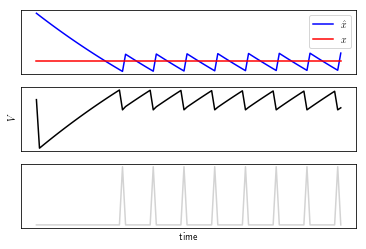

In [155]:
plots = 3

# enable LaTeX
pl.rc('text', usetex=True)

# plot input and read-out
pl.subplot(plots, 1, 1)
pl.plot(xhat, color='blue', label=r'$\hat{x}$')
pl.plot(x_t, color='red', label=r'$x$')
pl.yticks([])
pl.xticks([])
pl.legend()

# plot voltage
pl.subplot(plots, 1, 2)
pl.plot(V, color='black')
pl.ylabel(r'$V$')
pl.yticks([])
pl.xticks([])

# plot spikes
pl.subplot(plots, 1, 3)
pl.plot(spike, color='lightgrey')
pl.xlabel('time')
pl.yticks([])
pl.xticks([])